## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [3]:
training_dataset = pd.read_csv('/dataset/train.csv')
testing_dataset = pd.read_csv('/dataset/test.csv')

In [4]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [5]:
testing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [6]:
training_dataset.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [7]:
training_dataset['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

## Feature Enginnering

In [8]:
training_dataset['austim'] = training_dataset['austim'].map({'no':0,'yes':1})
testing_dataset['austim'] = testing_dataset['austim'].map({'no':0,'yes':1})

In [9]:
training_dataset['contry_of_res'].nunique()

56

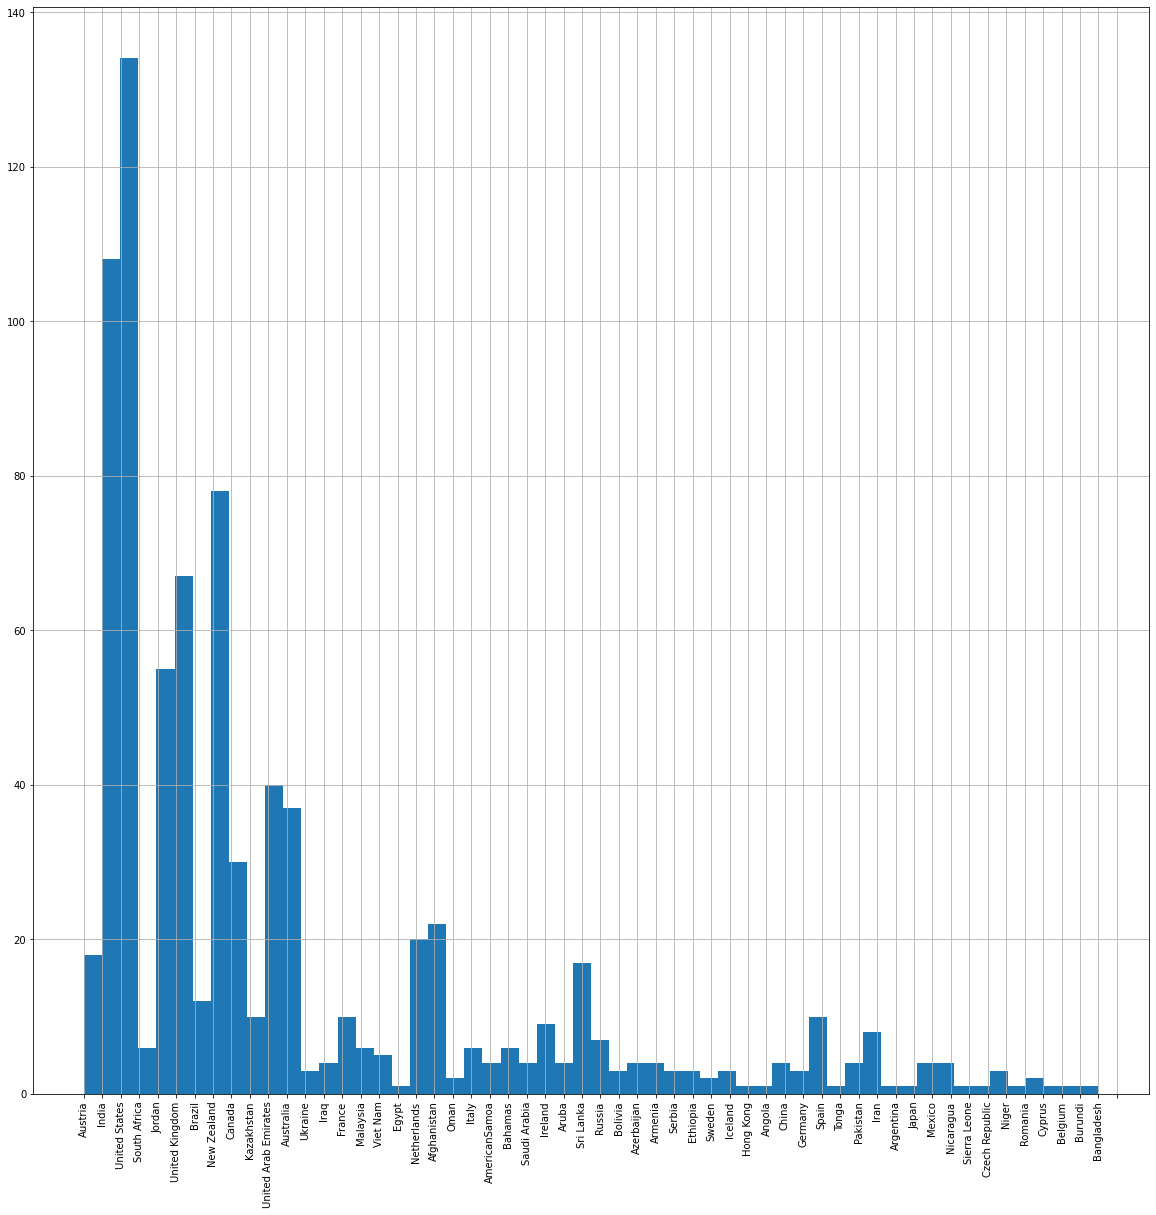

In [10]:
plt.figure(figsize=(20,20))
training_dataset['contry_of_res'].hist(linewidth=0.5,bins=56)
plt.xticks(range(0,57),rotation=90)
plt.show()

#### Find Autism relation to gender in Iraq

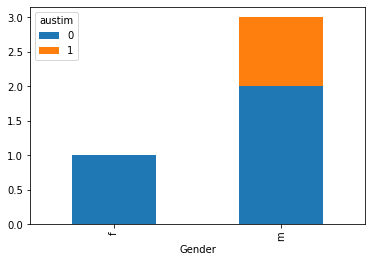

In [11]:
counts = training_dataset[training_dataset['contry_of_res'] == 'Iraq'].groupby(['gender', 'austim']).result.count().unstack()
counts.plot(kind='bar',stacked=True)
plt.xlabel('Gender')
plt.show()

#### get precentage of austim in Iraq

In [23]:
np.floor(training_dataset[training_dataset['contry_of_res'] == 'Iraq']['ID'].sum() / training_dataset['ID'].sum() * 100 * 100)

32.0

#### show the precentage of male , female they have autsim

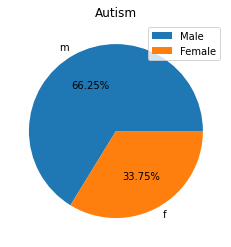

In [13]:
training_dataset['gender'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Autism')
plt.legend(['Male','Female'])

In [14]:
training_dataset.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

#### check missing values

In [15]:
training_dataset.isnull().mean() * 100

ID                 0.0
A1_Score           0.0
A2_Score           0.0
A3_Score           0.0
A4_Score           0.0
A5_Score           0.0
A6_Score           0.0
A7_Score           0.0
A8_Score           0.0
A9_Score           0.0
A10_Score          0.0
age                0.0
gender             0.0
ethnicity          0.0
jaundice           0.0
austim             0.0
contry_of_res      0.0
used_app_before    0.0
result             0.0
age_desc           0.0
relation           0.0
Class/ASD          0.0
dtype: float64

In [16]:
testing_dataset.isnull().mean() * 100

ID                 0.0
A1_Score           0.0
A2_Score           0.0
A3_Score           0.0
A4_Score           0.0
A5_Score           0.0
A6_Score           0.0
A7_Score           0.0
A8_Score           0.0
A9_Score           0.0
A10_Score          0.0
age                0.0
gender             0.0
ethnicity          0.0
jaundice           0.0
austim             0.0
contry_of_res      0.0
used_app_before    0.0
result             0.0
age_desc           0.0
relation           0.0
dtype: float64

## Label Encoding

#### deleting unnecessary columns country,age

In [24]:
del training_dataset['contry_of_res'],training_dataset['age_desc'],training_dataset['ID']
del testing_dataset['contry_of_res'],testing_dataset['age_desc'],testing_dataset['ID']

In [25]:
training_dataset.select_dtypes(include='object')

,gender,ethnicity,jaundice,used_app_before,relation
0,f,?,no,no,Self
1,m,?,no,no,Self
2,m,White-European,no,no,Self
3,f,?,no,no,Self
4,m,?,no,no,Self
...,...,...,...,...,...
795,m,Hispanic,no,no,Self
796,m,White-European,no,no,Self
797,m,South Asian,yes,no,Self
798,f,?,no,no,Self


In [26]:
ethnicity = {
    '?':0,
    'White-European':1, 
    'Middle Eastern ':2, 
    'Pasifika':3, 
    'Black':4,
    'Others':5, 
    'Hispanic':6, 
    'Asian':7, 
    'Turkish':8, 
    'South Asian':9, 
    'Latino':10,
    'others':11
}

relation = {
    'Self' : 0, 
    'Relative' : 1, 
    'Parent' : 2, 
    '?' : 3, 
    'Others' : 4,
    'Health care professional' : 5
}

# for training dataset
training_dataset['gender'] = training_dataset['gender'].map({'f':0,'m':1})
training_dataset['ethnicity'] = training_dataset['ethnicity'].map(ethnicity)
training_dataset['jaundice'] = training_dataset['jaundice'].map({'no':0,'yes':1})
training_dataset['used_app_before'] = training_dataset['used_app_before'].map({'no':0,'yes':1})
training_dataset['relation'] = training_dataset['relation'].map(relation)

# for testing dataset
testing_dataset['gender'] = testing_dataset['gender'].map({'f':0,'m':1})
testing_dataset['ethnicity'] = testing_dataset['ethnicity'].map(ethnicity)
testing_dataset['jaundice'] = testing_dataset['jaundice'].map({'no':0,'yes':1})
testing_dataset['used_app_before'] = testing_dataset['used_app_before'].map({'no':0,'yes':1})
testing_dataset['relation'] = testing_dataset['relation'].map(relation)

# take only the age in this case 18
# training_dataset['age_desc'] = training_dataset['age_desc'].apply(lambda x: x.split(' ')[0])
# training_dataset['age_desc'] = training_dataset['age_desc'].astype(np.int)

### Split the data for features , labels

In [27]:
X = training_dataset.loc[:,~training_dataset.columns.isin(['Class/ASD'])]
y = training_dataset['Class/ASD']

In [28]:
X_batch = X
y_batch = y

In [30]:
model = LogisticRegression(random_state=0,penalty='l2')
model.fit(X_batch,y_batch)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [31]:
prediction = model.predict(testing_dataset)

#### Get the score of the model

In [32]:
accuracy = model.score(testing_dataset,prediction)
accuracy

1.0